In [46]:
import numpy as np

from linear_regression import LinearRegression as MyLinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

from matplotlib import pyplot as plt

%matplotlib inline

In [47]:
RANDOM_STATE = 42

Сгенерируем данные для регрессии:

In [48]:
n_samples = 1000
n_outliers = 50

X, y, coef = make_regression(
    n_samples=n_samples, n_features=1,
    n_informative=1, noise=10,
    coef=True, random_state=RANDOM_STATE
)

# Add outlier data
np.random.seed(RANDOM_STATE)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

Разобьем данные на тренировочную и обучающую выборки:

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_STATE
)

Посмотрим на данные:

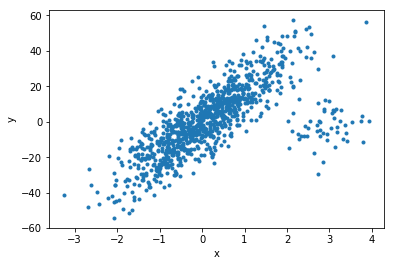

In [50]:
plt.plot(X, y, ".");
plt.xlabel("x");
plt.ylabel("y");

Обучим линейную модель и обучим ее на тренировочных данных:Ъ

In [51]:
linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Сделаем предикт на тестовых данных:

In [52]:
y_hat = linear_regression_model.predict(X_test)

Посмотрим на значения метрик:

In [53]:
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

MAE: 9.940362029807723
MSE: 173.1929838913916
R^2 score: 0.47263462857304817


Посмотрим на веса обученной модели:

In [54]:
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)

[11.3272569]
-1.3555932515073648


Визуализируем:

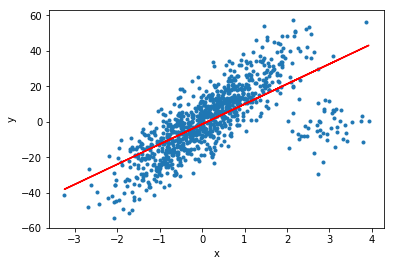

In [55]:
plt.plot(X, y, ".");
plt.plot(X, X * linear_regression_model.coef_ + linear_regression_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");

---

In [56]:
# TODO: выполните то же самое с написанной вами моделью:
# 1. обучите ее на (X_train, y_train)
#   * попробуйте обучать с регуляризацией и без
#   * пробуйте различные гиперпараметры (шаг градиента, коэффицент регуляризации)
# 2. оцените кач-во на X_test, используя все написанные вами метрики
# 3. сравните значения метрик с значениями метрик из sklearn.metrics
# 4. визуализируйте y = k * x + b, где k и b -- bias и вес вашей модели

In [63]:
from sklearn.model_selection import GridSearchCV
samples = np.linspace(0,1,num=10)[1:]
lin0 = MyLinearRegression()
lin0.fit(X_train, y_train)
res = lin0.predict(X_test)
metrics.mse(y_test,res),metrics.mae(y_test,res),metrics.r2_score(y_test,res)

(173.1929838913916, 9.940362029807723, 0.4726346285730483)

In [64]:
score = np.zeros((10,10))
for i in range(1,11):
    for j in range(1,11):
        lin = MyLinearRegression(i, 'L1', j)
        lin.fit(X_test, y_test)
        score[i-1,j-1] = metrics.r2_score(y_test,lin.predict(X_test))
maximum = score.argmax(),score.max
score = np.zeros((10,10))
for i in range(1,11):
    for j in range(1,11):
        lin = MyLinearRegression(i, 'L2', j)
        lin.fit(X_test, y_test)
        score[i-1,j-1] = metrics.r2_score(y_test,lin.predict(X_test))
if maximum>score.max:
    best = (maximum[0][0],'L1',maximum[0][1])
else:
    best = (score.argmax()[0],'L1',score.argmax()[1])

ValueError: shapes (330,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [65]:
lin = MyLinearRegression(*best)
lin.fit(X_train,y_train)
res=lin.predict(X_test)
metrics.mse(y_test,res),metrics.mae(y_test,res),metrics.r2_score(y_test,res)

NameError: name 'best' is not defined

In [66]:
mean_squared_error(y_test,res),mean_absolute_error(y_test,res),r2_score(y_test,res)

(173.1929838913916, 9.940362029807723, 0.47263462857304817)

Exception: Model is not fitted

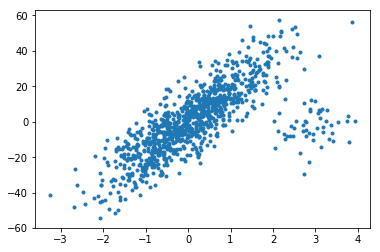

In [68]:
plt.plot(X, y, ".");
plt.plot(X, X * lin.get_weights()[1] + lin.get_weights()[0], "r")
plt.xlabel("x");
plt.ylabel("y");

P.S. проблему со слиянием матриц так и не решил. в слаке проблему описал, в другом интерпретаторе все норм работает.